# Assignment 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import pystan
import random
import pandas as pd
import itertools

As before I start by implementing the model in pySTAN.

In [3]:
#Importing data
y = np.array((607, 583, 521, 494, 369, 782, 570, 678, 467, 620, 425, 395, 346, 361, 310, 300, 382, 294, 315, 323, 421, 339, 398, 328, 335, 291, 329, 310, 294, 321, 286, 349, 279, 268, 293, 310, 259, 241, 243, 272, 247, 275, 220, 245, 268, 357, 273, 301, 322, 276, 401, 368, 149, 507, 411, 362, 358, 355, 362, 324, 332, 268, 259, 274, 248, 254, 242, 286, 276, 237, 259, 251, 239, 247, 260, 237, 206, 242, 361, 267, 245, 331, 357, 284, 263, 244, 317, 225, 254, 253, 251, 314, 239, 248, 250, 200, 256, 233, 427, 391, 331, 395, 337, 392, 352, 381, 330, 368, 381, 316, 335, 316, 302, 375, 361, 330, 351, 186, 221, 278, 244, 218, 126, 269, 238, 194, 384, 154, 555, 387, 317, 365, 357, 390, 320, 316, 297, 354, 266, 279, 327, 285, 258, 267, 226, 237, 264, 510, 490, 458, 425, 522, 927, 555, 550, 516, 548, 560, 545, 633, 496, 498, 223, 222, 309, 244, 207, 258, 255, 281, 258, 226, 257, 263, 266, 238, 249, 340, 247, 216, 241, 239, 226, 273, 235, 251, 290, 473, 416, 451, 475, 406, 349, 401, 334, 446, 401, 252, 266, 210, 228, 250, 265, 236, 289, 244, 327, 274, 223, 327, 307, 338, 345, 381, 369, 445, 296, 303, 326, 321, 309, 307, 319, 288, 299, 284, 278, 310, 282, 275, 372, 295, 306, 303, 285, 316, 294, 284, 324, 264, 278, 369, 254, 306, 237, 439, 287, 285, 261, 299, 311, 265, 292, 282, 271, 268, 270, 259, 269, 249, 261, 425, 291, 291, 441, 222, 347, 244, 232, 272, 264, 190, 219, 317, 232, 256, 185, 210, 213, 202, 226, 250, 238, 252, 233, 221, 220, 287, 267, 264, 273, 304, 294, 236, 200, 219, 276, 287, 365, 438, 420, 396, 359, 405, 397, 383, 360, 387, 429, 358, 459, 371, 368, 452, 358, 371))
ind = np.array((1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34))-1
#523->323 to Change back "the dude"

In [4]:
#Indicators that could be used depending on how the grouping is implemented
child_j = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
child_i = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

I copy and change the code from assignment 5. I select to use Gelman's implementation as I find it more intuitive than Kruschke's solution.

In [5]:
from __future__ import division
from pylab import * # this line will import math and plot functions that I may need

close('all')


## Stan implementation
ass6_code = """
data {
    int<lower=0> NInd; //Number of participants
    int<lower=0> Samples; // number of samples, integer with a lower bound = 0  
    real<lower=0> y[Samples]; // Vector of samples, y with length "Samples" of real values
    int Ind[Samples];
    real child_j[NInd];
}
parameters {
    real mu;
    real<lower=0> tau;
    real theta[NInd];
    real<lower=0> sigma;
    real phi; //predictor parameter
}
transformed parameters {
}
model {
    mu ~ uniform(-10000, 10000); // Flat prior distribution on mu
    tau ~ uniform(0, 10000); // Flat prior distribution on tau
    phi ~ uniform(-10000, 10000);
    for (i in 1:NInd)    
        theta[i] ~ normal(mu + phi*child_j[i], tau); // Group level prior distribution of theta
    sigma ~ uniform(0, 10000); // Flat prior distribution on sigma
    for (j in 1:Samples)
        y[j] ~ lognormal(theta[Ind[j]], sigma); // likelihood, i.e collected data. Note that stan will create the posterior automatically. 
}
"""


ass6_dat = {'Ind': ind+1, #correcting the indexing to start from 1 for the C++ compilation
            'NInd': np.max(ind)+1,
            'child_j': child_j,
            'Samples': np.size(y),
            'y': y}

model = pystan.StanModel(model_code=ass6_code) #Create a model instance
fit = model.sampling(data=ass6_dat,iter=100000,warmup=500, chains=1) #Call the sampling using the model instance

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1e0bb0b2ea6520657d241fefe952d032 NOW.


In [6]:
results=fit.extract(permuted=True) # return a dictionary of arrays with the sampled parameter data

In [7]:
def HDIofMCMC(SampleArray, credMass=.95): #Computes the HDI from an array of a unimodal samples of representative values.
    sortedarray=np.sort(SampleArray)
    CielingIndex=np.ceil(credMass*np.size(sortedarray))
    nCI=np.size(sortedarray)-CielingIndex
    ciWidth=np.zeros(int(nCI))
    for i in range(int(nCI)):
        ciWidth[i]=sortedarray[i+int(CielingIndex)]-sortedarray[i]
    HDImin=(sortedarray[np.argmin(ciWidth)])
    HDImax=(sortedarray[np.argmin(ciWidth)+int(CielingIndex)])
    HDIlim=np.array([HDImin,HDImax])
    return(HDIlim)

In [8]:
#Extracting resulting phi parameter values
Phi=results['phi'] # This is the parameter indicating the difference from the baseline (adult) parameter for the representative posterior samples.
sigma=results['sigma']#Same but for the sigma parameter
Tau=results['tau'] #Tau parameter
mu=results['mu'] #mu parameter
theta=results['theta']

## 1.
Do the two groups (i.e. adults and kids) have different log(reaction times) and if so what is the effect? 

In order to answer this question I plot the histogram of the sampled $\phi$ parameter. This parameter represents the difference in reaction time between children and adults.

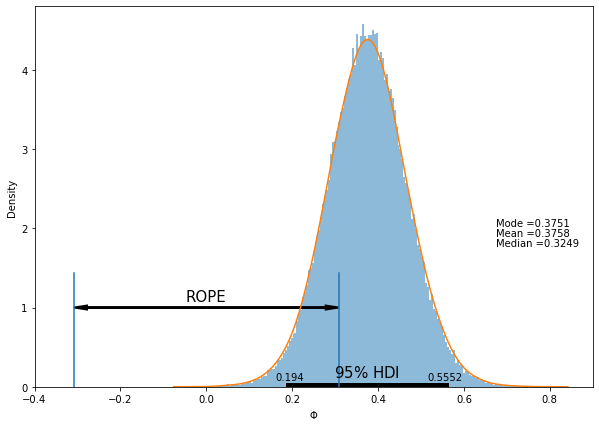

In [9]:
fig= plt.figure(figsize=(10,7))


#Posterior Histograms from MCMC
binsizePhi=np.linspace(np.min(Phi),np.max(Phi),200)
plt.hist(Phi,binsizePhi,density=True, alpha=.5)

#False smooth density plot
density = scipy.stats.gaussian_kde(Phi)
xs = np.linspace(min(Phi),max(Phi),1000)
density.covariance_factor = lambda : .2
density._compute_covariance()
plt.plot(xs,density(xs))

    
#Posterior HDI values
HDI=HDIofMCMC(Phi,.95) #Calculates the 95% HDI of the MCMC data
   
plt.plot(HDI,(0,0),'k',linewidth=8.0)
plt.text(np.mean(HDI), 0.12, r'$95\%$ HDI', fontsize=15,ha='center') #Plots text in the figure
plt.text(HDI[0], 0.08, str(np.round(HDI[0],4)), fontsize=10,ha='center')
plt.text(HDI[1], 0.08, str(np.round(HDI[1],4)), fontsize=10,ha='center')
plt.text(.8*np.max(Phi),2,'Mean ='+str(np.round(np.mean(Phi),4)),va='top')
plt.text(.8*np.max(Phi),2,'Mode ='+str(np.round(xs[np.argmax(density(xs))],4)),va='bottom')
plt.text(.8*np.max(Phi),1.75,'Median ='+str(np.round(Phi[int(np.size(Phi)/2)],4)),va='bottom')
axvline(x=.308, ymin=0, ymax=.3); axvline(x=-.308, ymin=0, ymax=.3) ##set ROPE limits

##Draws a two headed arrow
plt.arrow(0, 1, .308, 0, head_width=0.05, head_length=0.03, linewidth=2, color='k', length_includes_head=True)
plt.arrow(0, 1, -.308, 0, head_width=0.05, head_length=0.03, linewidth=2, color='k', length_includes_head=True) 
plt.text(0, 1.08, r'ROPE', fontsize=15,ha='center')
plt.xlim(-.4)

plt.xlabel(r'$\Phi$')
plt.ylabel('Density')

plt.show()

The 0 value is excluded from the 95% HDI seemingly indicating that there is a difference between the two groups in the data. I also tried to find a reasonable ROPE. I did this by concidering the fastest allowed reaction time in athletics. Any start quicker than 100 ms is considered a false start. From taking the expected value of the reaction times from assignment 5 (335 ms) and adding/subtracting 100 ms then calculating the difference in the natural logarithm ($ln(435/235)/2=0.308$) a ROPE of of $\pm 0.308$ on the zero value is realistic.  This ROPE overlaps the HDI so that we can't reject the null that there is no difference between the two groups.

## 2.
### a.

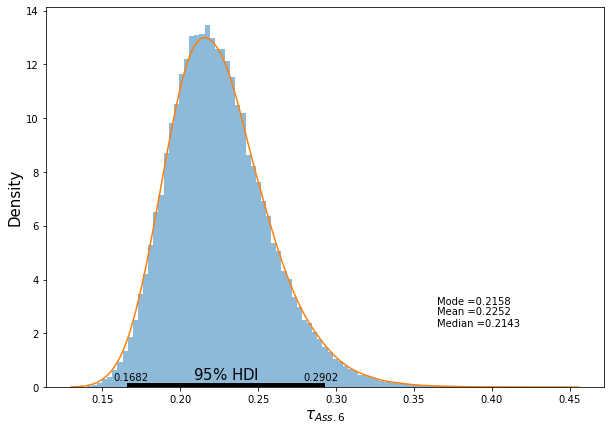

In [10]:
fig= plt.figure(figsize=(10,7))

#Posterior Histograms from MCMC
binsizeTau5=np.linspace(np.min(Tau),np.max(Tau),100)
plt.hist(Tau,binsizeTau5,density=True, alpha=.5)

#False smooth density plot, code I found online...
density = scipy.stats.gaussian_kde(Tau)
xs = np.linspace(min(Tau),max(Tau),1000)
density.covariance_factor = lambda : .2
density._compute_covariance()
plt.plot(xs,density(xs))

    
#Posterior HDI values
HDI=HDIofMCMC(Tau,.95) #Calculates the 95% HDI of the MCMC data

plt.plot(HDI,(0,0),'k',linewidth=8.0)
plt.text(np.mean(HDI), 0.3, r'$95\%$ HDI', fontsize=15,ha='center') #Plots text in the figure
plt.text(HDI[0], 0.25, str(np.round(HDI[0],4)), fontsize=10,ha='center')
plt.text(HDI[1], 0.25, str(np.round(HDI[1],4)), fontsize=10,ha='center')
plt.text(.8*np.max(Tau),3,'Mean ='+str(np.round(np.mean(Tau),4)),va='top')
plt.text(.8*np.max(Tau),3,'Mode ='+str(np.round(xs[np.argmax(density(xs))],4)),va='bottom')
plt.text(.8*np.max(Tau),2.2,'Median ='+str(np.round(Tau[int(np.size(Tau)/2)],4)),va='bottom')


##Draws a two headed arrow for ROPE
#axvline(x=.308, ymin=0, ymax=.3); axvline(x=-.308, ymin=0, ymax=.3) ##set ROPE limits
#plt.arrow(0, 1, .308, 0, head_width=0.05, head_length=0.03, linewidth=2, color='k', length_includes_head=True)
#plt.arrow(0, 1, -.308, 0, head_width=0.05, head_length=0.03, linewidth=2, color='k', length_includes_head=True) 
#plt.text(0, 1.08, r'ROPE', fontsize=15,ha='center')
#plt.xlim(-.4)

plt.xlabel(r'$\tau_{Ass. 6}$',fontsize=15)
plt.ylabel('Density',fontsize=15)

plt.savefig('Tau6.png')
plt.show()

Now plotting the two figures next to each other.

![Tau5](Tau5.png) ![Tau6](Tau6.png)



### b.
$\tau$ as a parameter in this model represents the standard deviation of the expected log(reaction time). With the model split in two groups, children and adults, the $\Phi$ parameter represents the difference between the groups. Previously, in assignment 5, this difference was captured by $\tau$. In order to accomodate data from both groups in the estimate of $\theta$ the sampled $\tau$ parameters had a wider distribution as well as generally higher values. In assignment 6 the lower spread in $\tau$ indicates that splitting the data into two groups overall has increased the precision in our sampled estimates of $\theta$.   

### c.
This will reduce the overall shrinkage in the model since the estimate of the hyperparameter $\mu$ is more precise (has lower $\tau$). This is also logical since spliting the model into two relevantly different groups should make the measured data more closely resemble the "true" mean. It should also be mentioned that shrinkage should now be different for the two groups as the estimated mean of $\theta$ is different for the two models, $\mu$ for adults and $\mu+\Phi$ for children.

## 3.
Plot the two prior distributions for the expected log(reaction time), one for kids and one for adults. To do this I just sample from normal distributions (as in assignment 2) with parameters (location ($\mu$ and scale ($\tau$) taken as point estimates from the posterior distribution. 

In [11]:
def PDFnormal(x,mu,sigma):
    y=1/np.sqrt(2*np.pi*sigma**2)*np.exp(-.5*(x-mu)**2/sigma**2)
    return y

#From the data
#Mean values
Prior_mu_child=np.mean(mu+Phi)
Prior_mu_adult=np.mean(mu)


#Std_deviations
meanTau=np.mean(Tau)


NumbVal=10000  #Number of values to be sampled
N_child=np.zeros(NumbVal); N_adult=np.zeros(NumbVal) #Pre-allocation N

for e in range(NumbVal):
    N_child[e]=np.random.normal(loc=Prior_mu_child, scale=meanTau) #inverse transform sampling
    N_adult[e]=np.random.normal(loc=Prior_mu_adult, scale=meanTau) #inverse transform sampling


In [12]:
np.mean(mu)+np.mean(Phi)

6.037254314926075

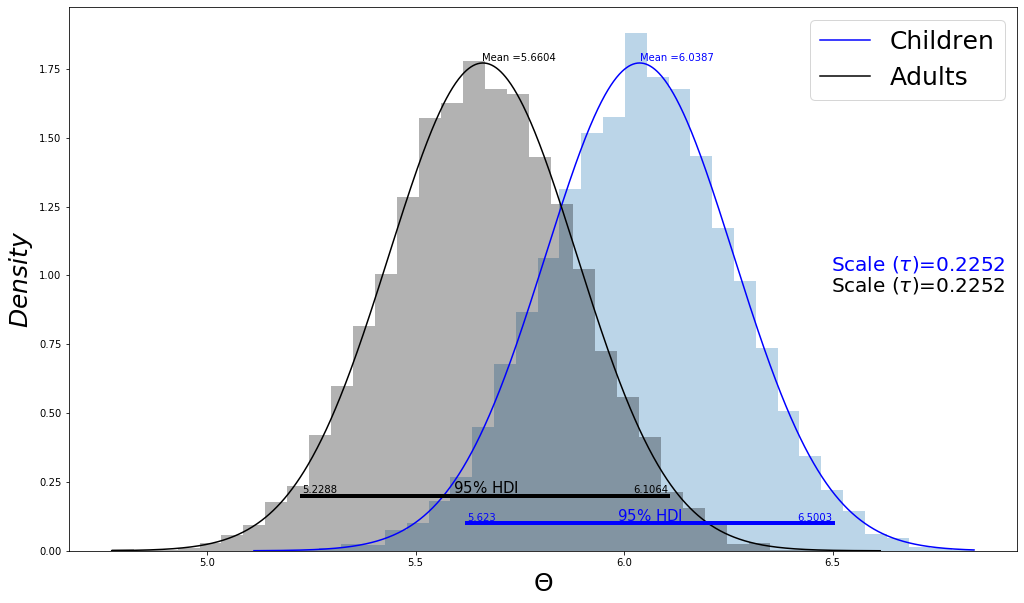

In [15]:
#Plotting
fig= plt.figure(figsize=(17,10))
#Plot Children
binsize_1=np.linspace(min(N_child),max(N_child),int(((max(N_child)-min(N_child))/.05)))
plt.hist(N_child,binsize_1,density=True,alpha=.3)
xplot=np.linspace(min(N_child),max(N_child),1000)
plt.plot(xplot,PDFnormal(xplot,Prior_mu_child,meanTau),'b') #Plot calling the PDF function

#Plot Adults
binsize_2=np.linspace(min(N_adult),max(N_adult),int(((max(N_adult)-min(N_adult))/.05)))
plt.hist(N_adult,binsize_2,density=True,alpha=.3,color='k')
xplot=np.linspace(min(N_adult),max(N_adult),1000)
plt.plot(xplot,PDFnormal(xplot,Prior_mu_adult,meanTau),'k') #Plot calling the PDF function

##Plot Total
#binsize_3=np.linspace(min(N_tot),max(N_tot),int(((max(N_tot)-min(N_tot))/.05)))
#plt.hist(N_tot,binsize_3,density=True,alpha=.3, color='r')
#xplot=np.linspace(min(N_tot),max(N_tot),1000)
#plt.plot(xplot,PDFnormal(xplot,Prior_mu_tot,Sigma_tot),'r') #Plot calling the PDF function


#HDI

HDI_child=HDIofMCMC(N_child,.95) #Calculates the 95% HDI of the MCMC data
HDI_adult=HDIofMCMC(N_adult,.95)
#HDI_tot=HDIofMCMC(N_tot,.95)



plt.plot(HDI_child,(0.1,0.1),'b',linewidth=4.0)
plt.text(np.mean(HDI_child), 0.11, r'$95\%$ HDI',color='b', fontsize=15,ha='center') #Plots text in the figure

plt.plot(HDI_adult,(0.2,0.2),'k',linewidth=4.0)
plt.text(np.mean(HDI_adult), 0.21, r'$95\%$ HDI', color='k' ,  fontsize=15,ha='center') #Plots text in the figure

#plt.plot(HDI_tot,(.01,0.01),'r',linewidth=4.0)
#plt.text(np.mean(HDI_tot), 0.02, r'$95\%$ HDI',color='r' , fontsize=15,ha='center') #Plots text in the figure

plt.text(HDI_child[0], 0.11, str(np.round(HDI_child[0],4)),color='b', fontsize=10,ha='left')
plt.text(HDI_child[1], 0.11, str(np.round(HDI_child[1],4)),color='b', fontsize=10,ha='right')

plt.text(HDI_adult[0], 0.21, str(np.round(HDI_adult[0],4)),color='k', fontsize=10,ha='left')
plt.text(HDI_adult[1], 0.21, str(np.round(HDI_adult[1],4)),color='k', fontsize=10,ha='right')

#plt.text(HDI_tot[0], 0.02, str(np.round(HDI_child[0],4)),color='r', fontsize=10,ha='left')
#plt.text(HDI_tot[1], 0.02, str(np.round(HDI_child[1],4)),color='r', fontsize=10,ha='right')

plt.text(np.mean(N_child),np.max(PDFnormal(xplot,Prior_mu_child,meanTau)),'Mean ='+str(np.round(np.mean(N_child),4)),color='b',va='bottom',ha='left')
plt.text(np.mean(N_adult),np.max(PDFnormal(xplot,Prior_mu_adult,meanTau)),'Mean ='+str(np.round(np.mean(N_adult),4)),color='k',va='bottom',ha='left')
#plt.text(np.mean(N_tot),np.max(PDFnormal(xplot,Prior_mu_tot,Sigma_tot)),'Mean ='+str(np.round(np.mean(N_tot),4)),color='r',va='bottom',ha='left')


plt.text(.95*np.max(N_child),1,r'Scale $(\tau)$='+str(np.round(meanTau,4)), color='b', fontsize=20, va='bottom')
plt.text(.95*np.max(N_child),1,r'Scale $(\tau)$='+str(np.round(meanTau,4)), color='k', fontsize=20, va='top')
#plt.text(.9*np.max(N_child),.956,r'Scale $(\sigma)$='+str(np.round(Sigma_tot,4)), color='r', fontsize=10, va='top')
#plt.text(.8*np.max(Tau),.9,'Median ='+str(np.round(Tau[int(np.size(Tau)/2)],4)),va='bottom')



plt.legend([r'Children','Adults'],fontsize=25)
plt.xlabel(r'$\Theta$', fontsize=25)
plt.ylabel(r'$Density$', fontsize=25)
plt.show()

The first observation I make is that the distributions have the same shape as they have a joint scale parameter. Looking at the data that was the input for the model this could be questioned as there was clearly a greater spread in reaction times among the kids. If the prior is to be normally distributed maybe a parameter changing also the scale of the prior should be used. The difference in prior location indicates that there is a difference in reaction time at group level for the average realistic prior. 

## 4.
Provide posterior predictive distribution with knowledge of if the individual is a child and one without knowledge of if it is a child.

To do this I sample 10000 parameter sets from the posterior distribution. In order to capture the difference between children and adults I need to express the reaction times without using the posterior sample of $\theta_i$. If I would have used $\theta_i$ for the posterior preedictive sampling the $\phi$ parameter would have been informing the values for all individuals ("There is a little bit of child in all of us" -Jakob) and I could not have separated the data. 

For a child the expected reaction time is $E(y_{child})= =\mu+\phi+\tau*N(0,1)$. For an adult the reaction time is $E(y_{adult})=\mu+\tau*N(0,1)$. Since we know that $y_i=exp(E(y_i)+\sigma*N(0,1))$ we have all parameters we need to sample for $y_{child}$ and $y_{adult}$.  

In [16]:
RandArg=np.random.randint(0,np.size(mu),10000) #10000 random integers between 0 and the size of mu.
Ey_child=np.zeros(np.size(RandArg))
Ey_adult=np.zeros(np.size(RandArg))
y_child=np.zeros(np.size(RandArg))
y_adult=np.zeros(np.size(RandArg))


for i in range(np.size(RandArg)):
    Ey_child[i]+=np.random.normal(mu[RandArg[i]]+Phi[RandArg[i]],Tau[RandArg[i]])
    y_child[i]+=exp(np.random.normal(Ey_child[i],sigma[RandArg[i]]))
    
    
RandArg=np.random.randint(0,np.size(mu),10000) #10000 random integers between 0 and the size of mu.
for i in range(np.size(RandArg)):
    Ey_adult[i]+=np.random.normal(mu[RandArg[i]],Tau[RandArg[i]])
    y_adult[i]+=exp(np.random.normal(Ey_adult[i],sigma[RandArg[i]]))

For the case when we want to sample not knowing if it is a child or not (whether to consider phi or not) we use a bernoulli distribution together with a beta(1,1) prior to simulate if the sampled individual is a child. This way we end up with a beta(z+1,N-z+1). z=number of children, N number of people. If a random number beta(z+1,N-z+1)<U(0,1) the sample is a child and I include $\phi$ in the sampling.

In [17]:
z=np.sum(child_j)
N=np.size(child_j)
RandArg=np.random.randint(0,np.size(mu),10000) #10000 random integers between 0 and the size of mu.
y_random=np.zeros(np.size(RandArg))

Ey_random=np.zeros(np.size(RandArg))
for i in range(np.size(RandArg)):
    B=np.random.beta(z+1,N-z+1)
    U=np.random.random()
    if B>U:
        Ey_random[i]+=np.random.normal(mu[RandArg[i]]+Phi[RandArg[i]],Tau[RandArg[i]])
    else:
        Ey_random[i]+=np.random.normal(mu[RandArg[i]],Tau[RandArg[i]])
    y_random[i]+=exp(np.random.normal(Ey_random[i],sigma[RandArg[i]]))

In [18]:
np.size(Ey_random)

10000

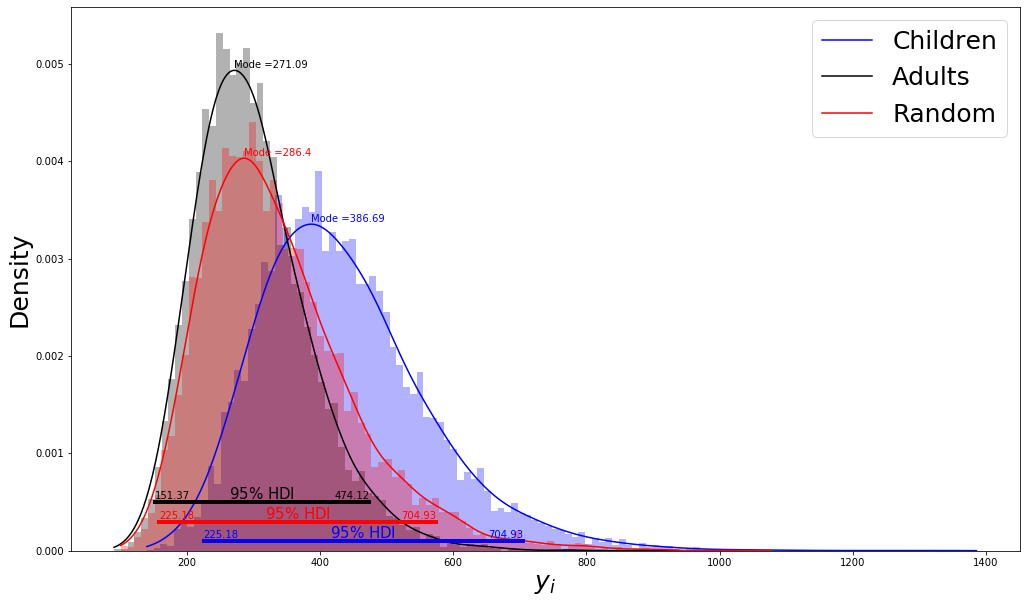

In [19]:
#Plotting
fig= plt.figure(figsize=(17,10))
#Plot Children
binsize_1=np.linspace(min(y_child),max(y_child),int(((max(y_child)-min(y_child))/10)))
plt.hist(y_child,binsize_1,density=True,color='b',alpha=.3)

density = scipy.stats.gaussian_kde(y_child)
xs1 = np.linspace(min(y_child),max(y_child),1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
y1=density(xs1)
plt.plot(xs1,y1,color='b')


#Plot Adults
binsize_2=np.linspace(min(y_adult),max(y_adult),int(((max(y_adult)-min(y_adult))/10)))
plt.hist(y_adult,binsize_2,density=True,color='k',alpha=.3)

density = scipy.stats.gaussian_kde(y_adult)
xs2 = np.linspace(min(y_adult),max(y_adult),1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
y2=density(xs2)
plt.plot(xs2,y2,color='k')


#Plot Random
binsize_3=np.linspace(min(y_random),max(y_random),int(((max(y_random)-min(y_random))/10)))
plt.hist(y_random,binsize_3,density=True,color='r',alpha=.3)

density = scipy.stats.gaussian_kde(y_random)
xs3 = np.linspace(min(y_random),max(y_random),1000)
density.covariance_factor = lambda : .2
density._compute_covariance()
y3=density(xs3)
plt.plot(xs3,y3,color='r')


HDI_child=HDIofMCMC(y_child,.95) #Calculates the 95% HDI of the MCMC data
HDI_adult=HDIofMCMC(y_adult,.95)
HDI_tot=HDIofMCMC(y_random,.95)



plt.plot(HDI_child,(0.0001,0.0001),'b',linewidth=4.0)
plt.text(np.mean(HDI_child), 0.00013, r'$95\%$ HDI',color='b', fontsize=15,ha='center') #Plots text in the figure
#
plt.plot(HDI_adult,(0.0005,0.0005),'k',linewidth=4.0)
plt.text(np.mean(HDI_adult), 0.00053, r'$95\%$ HDI', color='k' ,  fontsize=15,ha='center') #Plots text in the figure
#
plt.plot(HDI_tot,(.0003,.0003),'r',linewidth=4.0)
plt.text(np.mean(HDI_tot), .00033, r'$95\%$ HDI',color='r' , fontsize=15,ha='center') #Plots text in the figure
#
plt.text(HDI_child[0], 0.00013, str(np.round(HDI_child[0],2)),color='b', fontsize=10,ha='left')
plt.text(HDI_child[1], 0.00013, str(np.round(HDI_child[1],2)),color='b', fontsize=10,ha='right')
#
plt.text(HDI_adult[0], 0.00053, str(np.round(HDI_adult[0],2)),color='k', fontsize=10,ha='left')
plt.text(HDI_adult[1], 0.00053, str(np.round(HDI_adult[1],2)),color='k', fontsize=10,ha='right')
#
plt.text(HDI_tot[0], .00033, str(np.round(HDI_child[0],2)),color='r', fontsize=10,ha='left')
plt.text(HDI_tot[1], .00033, str(np.round(HDI_child[1],2)),color='r', fontsize=10,ha='right')
#
plt.text(xs1[np.argmax(y1)],np.max(y1),'Mode ='+str(np.round(xs1[np.argmax(y1)],2)),color='b',va='bottom',ha='left')
plt.text(xs2[np.argmax(y2)],np.max(y2),'Mode ='+str(np.round(xs2[np.argmax(y2)],2)),color='k',va='bottom',ha='left')
plt.text(xs3[np.argmax(y3)],np.max(y3),'Mode ='+str(np.round(xs3[np.argmax(y3)],2)),color='r',va='bottom',ha='left')
#
#
#plt.text(.9*np.max(N_child),1,r'Scale $(\sigma)$='+str(np.round(Sigma_child,4)), color='b', fontsize=10, va='bottom')
#plt.text(.9*np.max(N_child),1,r'Scale $(\sigma)$='+str(np.round(Sigma_adult,4)), color='k', fontsize=10, va='top')
#plt.text(.9*np.max(N_child),.956,r'Scale $(\sigma)$='+str(np.round(Sigma_tot,4)), color='r', fontsize=10, va='top')
#plt.text(.8*np.max(Tau),.9,'Median ='+str(np.round(Tau[int(np.size(Tau)/2)],4)),va='bottom')


plt.legend([r'Children','Adults','Random'],fontsize=25)
plt.ylabel(r'Density', fontsize=25)
plt.xlabel(r'$y_i$', fontsize=25)
plt.show()


In [ ]:
np.max(xs3)

In [ ]:
y_child

In [20]:
help(acovlim())

NameError: name 'acovlim' is not defined

In [ ]:
# ess -- effective sample size (Kruschke 2014, page 184) for assignment 7
#function ess(x)
#    if typeof(x)==Vector{Float64}
#        n = length(x)
#        acf = acovlim(x)
#        return n/(1+2*sum(acf[2:end]))
#    else
#        m,n = size(x)
#        list = zeros(m)
#        for i in 1:m
#            acf = acovlim(x[i,:])
#            list[i] = n/(1+2*sum(acf[2:end]))
#        end
#        return list
#    end
#end